In [17]:
import os
import skimage
from skimage import io
import numpy as np
from lt_classifier import training_data_generate, train_model, predict_model, save_result, accuracy_assessment

In [3]:
def train_classifier(fore, back, mode="CART"):

    train_img_list = [back, fore]
    train_img_kinds = [0,1]
    train_data, train_kind = training_data_generate(train_img_list, train_img_kinds)
    cart_clf = train_model(train_data, train_kind, classifier=mode)

    return cart_clf

In [5]:
fore = io.imread(r'Z:\共享云端硬盘\broccoliProject\10_locate_by_cv\training_data\fore0417.png')
back = io.imread(r'Z:\共享云端硬盘\broccoliProject\10_locate_by_cv\training_data\back0417_grass.png')

In [6]:
cart_clf = train_classifier(fore, back, mode="CART")

|--- Convert kind [0] to training data, converted shape is (563848, 13)
|--- Convert kind [1] to training data, converted shape is (10166, 13)
|-- Training model time cost=3s


In [7]:
project_name = 'broccoli_tanashi_5_20200417_mavicRGB_15m_M'
project_path = f"Z:/共享云端硬盘/broccoliProject/01_tanashi_broccoli2020_RGB_AP/{project_name}"
raw_img_folder=f"Z:/共享云端硬盘/broccoliProject/00_rgb_raw/{project_name}"
param_folder = f"{project_path}/params"

out_folder = f"Z:/共享云端硬盘/broccoliProject/10_anotation_use/png/{project_name}"
json_name = f"{out_folder}.json"

In [18]:
test1 = io.imread(os.path.join(out_folder, 'grid_x04_y06.png'))
test2 = io.imread(os.path.join(out_folder, 'grid_x06_y14.png'))

In [19]:
result1 = predict_model(test1, cart_clf)

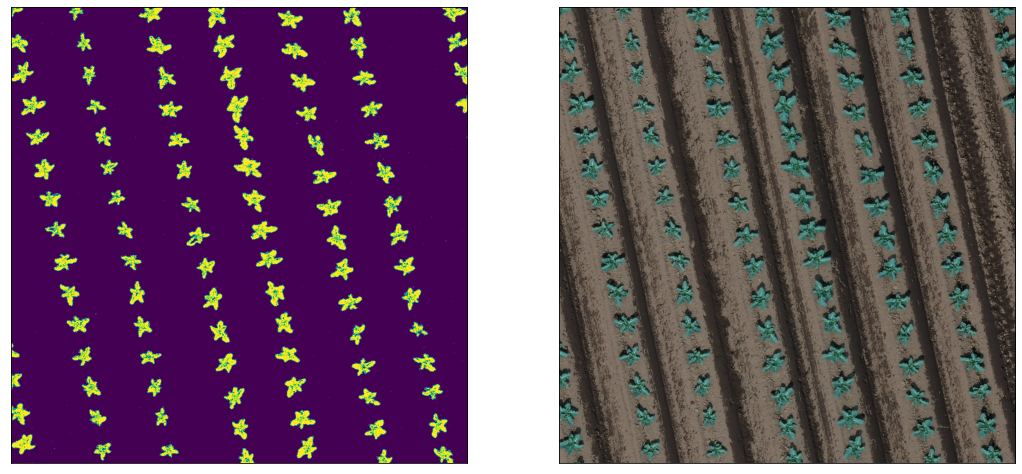

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18, 9))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(result1)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.imshow(test1)

In [14]:
%%time
result2 = predict_model(test2, cart_clf)

Wall time: 19 s


In [15]:
%prun result2 = predict_model(test2, cart_clf)

         2547070 function calls (2547028 primitive calls) in 18.644 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        8    3.872    0.484    8.700    1.087 lt_fast_glcm.py:9(fast_glcm)
      512    3.627    0.007    3.627    0.007 {filter2D}
        1    3.079    3.079    6.052    6.052 _hog.py:46(hog)
   314721    1.376    0.000    1.894    0.000 {skimage.draw._draw._line}
        1    1.099    1.099    2.266    2.266 lt_fast_glcm.py:135(fast_glcm_entropy)
       18    0.972    0.054    0.972    0.054 {method 'astype' of 'numpy.ndarray' objects}
        1    0.822    0.822    1.904    1.904 lt_fast_glcm.py:49(fast_glcm_std)
   629494    0.453    0.000    0.453    0.000 {built-in method numpy.array}
    34596    0.384    0.000    0.729    0.000 _hog.py:5(_hog_normalize_block)
    69206    0.366    0.000    0.366    0.000 {method 'reduce' of 'numpy.ufunc' objects}
        1    0.348    0.348    1.420    1.420 lt_fast_g

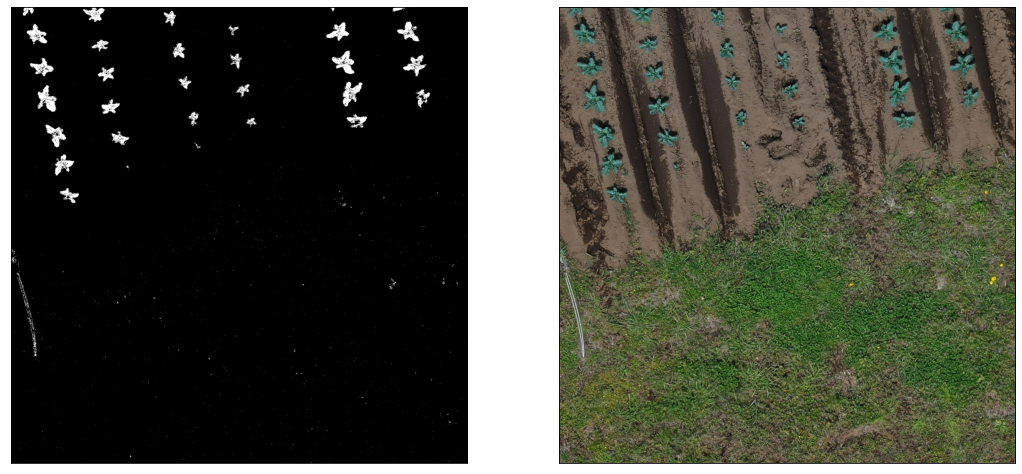

In [16]:
fig = plt.figure(figsize=(18, 9))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(result2, cmap='gray')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.imshow(test2)